In [12]:
from sklearn.neighbors import KNeighborsClassifier
import dtaidistance

from dtaidistance import dtw_visualisation
import numpy as np

In [31]:
def L2_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2, window=1)

def DTW_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2)

def DTW_signals_path(v1, v2):
    return dtaidistance.dtw.warping_path(v1, v2)

def DTW_signals_warping_paths(v1, v2):
    return dtaidistance.dtw.warping_paths(v1, v2)

def DTW_signals_visualization(v1, v2, path):
    return dtaidistance.dtw_visualisation.plot_warping(v1, v2, path)

def DTW_signals_plot_warping_path(v1, v2, path, matr):
    dtaidistance.dtw_visualisation.plot_warpingpaths(v1, v2, matr, path)



def DTW_signals1(v1, v2):
    n = len(v1)
    dp = np.zeros((n, n))
    dp[0][0] = (v1[0] - v2[0]) ** 2
    for i in range(1, n):
        dp[i][0] = dp[i - 1][0] + (v1[i] - v2[0]) ** 2
    for i in range(1, n):
        dp[0][i] = dp[0][i - 1] + (v1[0] - v2[i]) ** 2
    for i in range(1, n):
        for j in range(1, n):
            dp[i][j] = (v1[i] - v2[j]) ** 2 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return dp[n - 1][n - 1]

In [32]:
def DTW_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2)

[ 0.00000000e+00  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114701e-01
  9.82287251e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327926e-01  8.09016994e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779292e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333234e-01  6.27905195e-02  1.22464680e-16 -6.27905195e-02
 -1.25333234e-01 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01
 -5.87785252e-01 -6.37423

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfb1e6e090>,
       dtype=object))

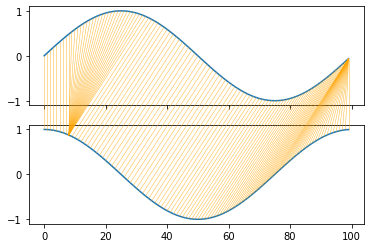

In [38]:
n = 100
ts1 = np.array(np.sin(np.arange(n) * 2 * np.pi / n), dtype=float)
ts2 = np.array(np.cos(np.arange(n) * 2 * np.pi / n), dtype=float)

print(ts1)


path = DTW_signals_path(ts1, ts2)
print(path)
DTW_signals_visualization(ts1, ts2, path)

In [21]:
v1 = np.array([0, 1, 0], dtype=np.double)
v2 = np.array([1, 0, 1], dtype=np.double)

In [22]:
DTW_signals(v1, v2) ** 2

2.0000000000000004

In [23]:
L2_signals(v1, v2) ** 2

2.9999999999999996

In [24]:
path = DTW_signals_path(v1, v2)
path

[(0, 0), (0, 1), (1, 2), (2, 2)]

In [25]:
dist, matr = DTW_signals_warping_paths(v1, v2)
dist, matr

(1.4142135623730951,
 array([[0.        ,        inf,        inf,        inf],
        [       inf, 1.        , 1.        , 1.41421356],
        [       inf, 1.        , 1.41421356, 1.        ],
        [       inf, 1.41421356, 1.        , 1.41421356]]))

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfb3e1aa90>,
       dtype=object))

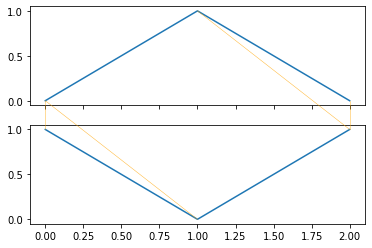

In [26]:
DTW_signals_visualization(v1, v2, path)

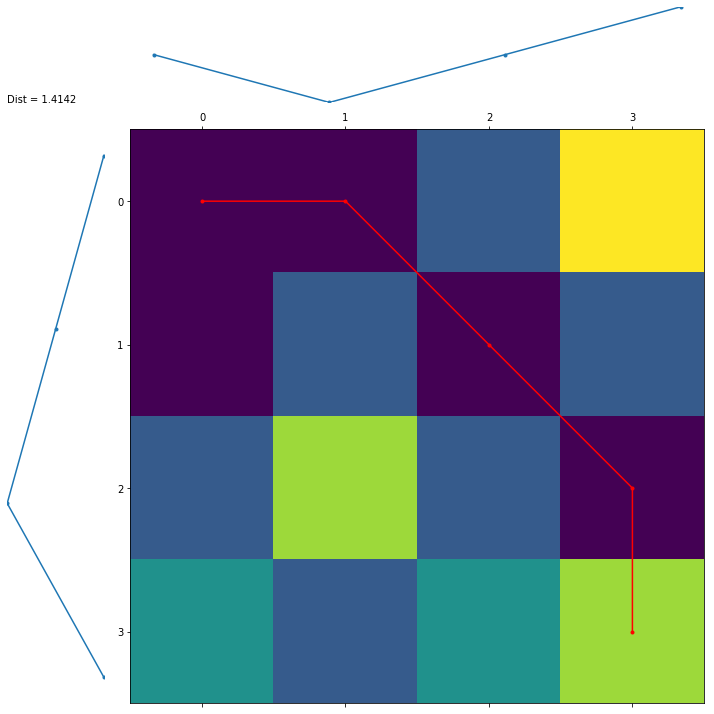

In [70]:
DTW_signals_plot_warping_path(v1, v2, path, matr)

In [76]:
DTW_signals1(v1, v2)

2.0

In [82]:
class SimpleExperiment:
    
    def __init__(self, sig1, sig2):
        self.sig1 = sig1
        self.sig2 = sig2
        
    def calc_dist(self):
        self.L2 = L2_signals(v1, v2)
        self.DTW = DTW_signals(v1, v2)
        print('L2-distance value', self.L2)
        print('L2-squared value', self.L2 ** 2)
        print('DTW-distance value', self.DTW)
        print('DTW-squared value', self.DTW ** 2)
        return (self.L2, self.DTW)
    
    def visualise(self):
        self.path = DTW_signals_path(self.sig1, self.sig2)
        self.matr = DTW_signals_warping_paths(self.sig1, self.sig2)[1]
        DTW_signals_visualization(self.sig1, self.sig2, self.path)
        DTW_signals_plot_warping_path(self.sig1, self.sig2, self.path, self.matr) 

L2-distance value 1.7320508075688772
L2-squared value 2.9999999999999996
DTW-distance value 1.4142135623730951
DTW-squared value 2.0000000000000004


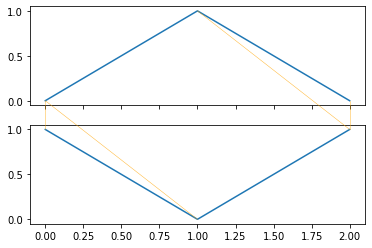

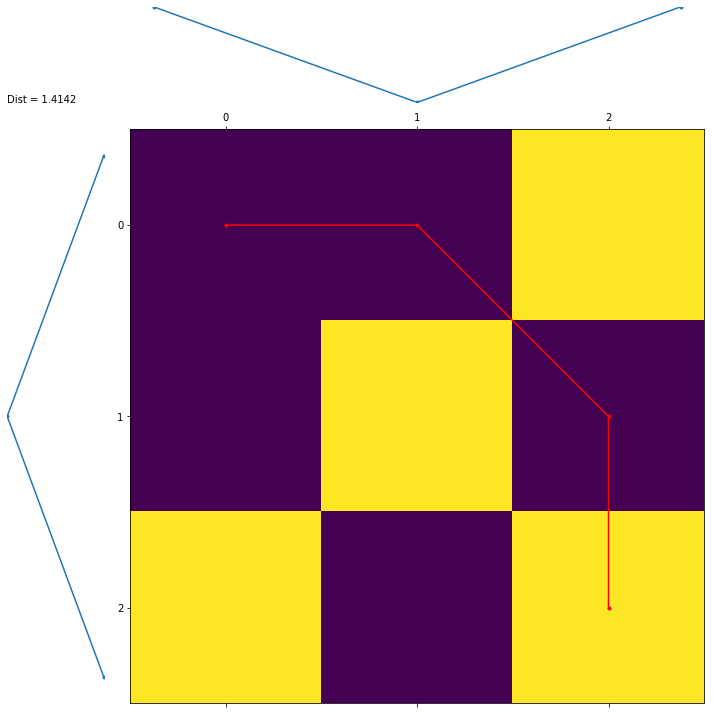

In [84]:
exp = SimpleExperiment(v1, v2)

exp.calc_dist()
exp.visualise()

In [4]:
def DTW_time_series(v1, v2, metric):
    n = len(v1)
    m = len(v2)
    dp = np.zeros((n, m))
    dp[0][0] = metric(v1[0], v2[0])
    for i in range(1, n):
        dp[i][0] = dp[i - 1][0] + metric(v1[i], v2[0])
    for i in range(1, m):
        dp[0][i] = dp[0][i - 1] + metric(v1[0], v2[i])
    for i in range(1, n):
        for j in range(1, m):
            dp[i][j] = metric(v1[i], v2[j]) + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return dp[n - 1][m - 1]

In [5]:
class Experiment:
    '''
    MDTW model for machine learning solving classification problem
    '''
    
    def __init__(self, n_neighbors=5):
        self.L2_model = KNeighborsClassifier(n_neighbors, metric=L2_signals)
        self.DTW_model = KNeighborsClassifier(n_neighbors, metric=DTW_signals)
    
    def fit(self, X, y):
        self.L2_model.fit(X, y)
        self.DTW_model.fit(X, y)
        
    def predict(self, y):
        self.L2_predicted = self.L2_model.predict(y)
        self.DTW_predicted = self.DTW_model.predict(y)
        
    def get_accuracy(self, true_val):
        return (np.sum(true_val == self.L2_predicted) / len(true_val),
                np.sum(true_val == self.DTW_predicted) / len(true_val))